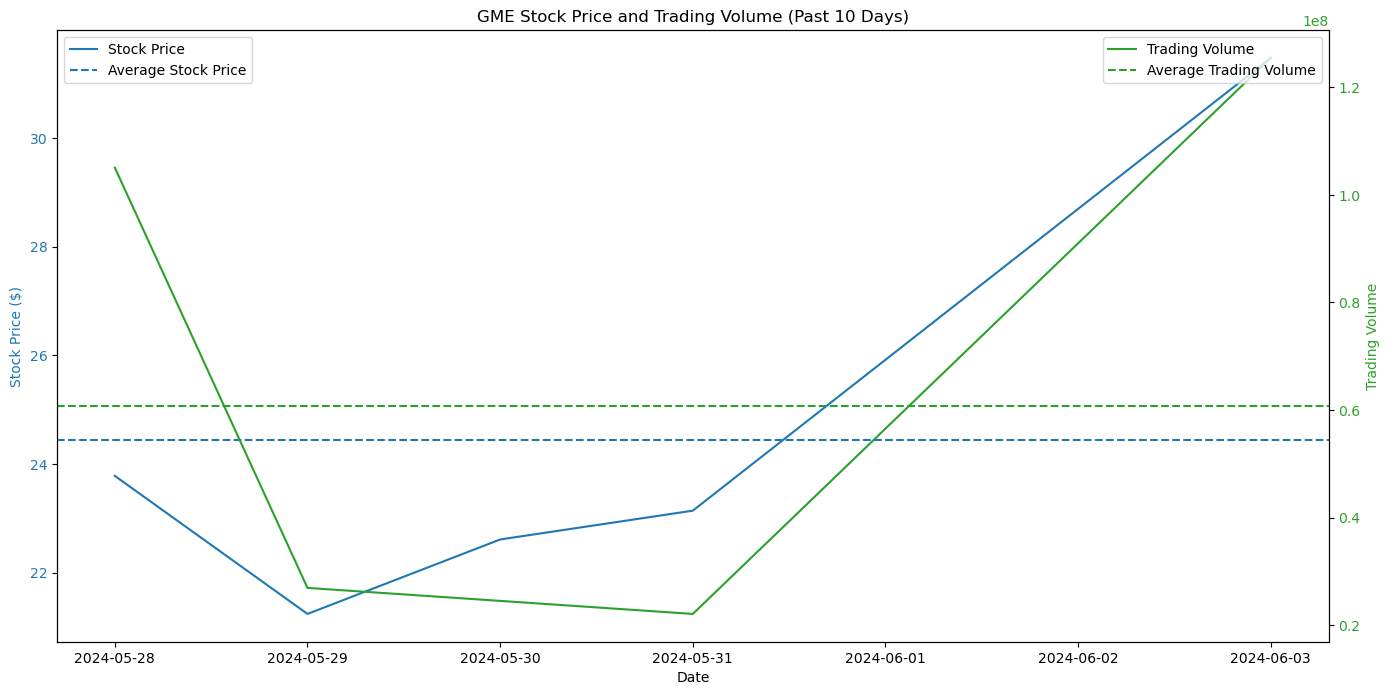

In [14]:
"""
This script fetches the historical stock data for GME (GameStop Corp.) for the past 5 days using the yfinance package.
It calculates the average closing price and average trading volume over this period.
The script then creates a dual-axis plot using matplotlib to display the stock prices and trading volumes, along with their respective averages.
The result is a comprehensive visualization that provides insights into the recent performance of GME stock.
"""

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fetch the GME stock data for the past 10 days
gme = yf.Ticker("GME")
gme_hist = gme.history(period="5d")

# Calculate the average stock price and average trading volume
average_price = gme_hist['Close'].mean()
average_volume = gme_hist['Volume'].mean()

# Plot the stock price and trading volume
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color=color)
ax1.plot(gme_hist.index, gme_hist['Close'], color=color, label='Stock Price')
ax1.axhline(average_price, color=color, linestyle='--', label='Average Stock Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Trading Volume', color=color)
ax2.plot(gme_hist.index, gme_hist['Volume'], color=color, label='Trading Volume')
ax2.axhline(average_volume, color=color, linestyle='--', label='Average Trading Volume')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # to prevent overlap of labels
plt.title('GME Stock Price and Trading Volume (Past 10 Days)')
plt.show()





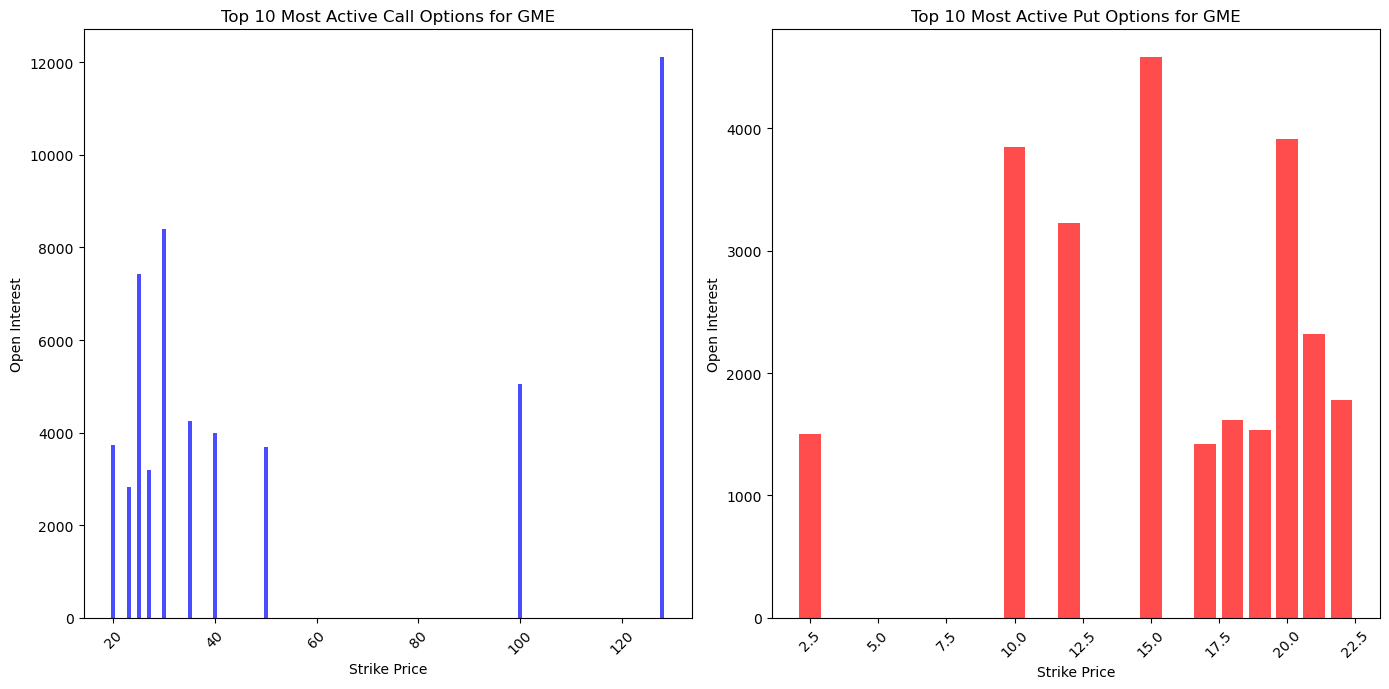

In [12]:
"""
This script fetches the historical stock data for GME (GameStop Corp.) for the past 5 days using the yfinance package.
It calculates the average closing price and average trading volume over this period.
The script then creates a dual-axis plot using matplotlib to display the stock prices and trading volumes, along with their respective averages.
The result is a comprehensive visualization that provides insights into the recent performance of GME stock.
"""

# Get the expiration dates for options
expirations = gme.options

# Fetch option data for the nearest expiration date
options_data = gme.option_chain(expirations[0])
calls = options_data.calls
puts = options_data.puts

# Identify the most active options by open interest
most_active_calls = calls.sort_values(by='openInterest', ascending=False).head(10)
most_active_puts = puts.sort_values(by='openInterest', ascending=False).head(10)

# Plotting the most active calls
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(most_active_calls['strike'], most_active_calls['openInterest'], color='blue', alpha=0.7)
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Top 10 Most Active Call Options for GME')
plt.xticks(rotation=45)

# Plotting the most active puts
plt.subplot(1, 2, 2)
plt.bar(most_active_puts['strike'], most_active_puts['openInterest'], color='red', alpha=0.7)
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Top 10 Most Active Put Options for GME')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/kz/_jxr42t969j3x9sdgjxvqjsc0000gn/T/ipykernel_95655/2024218972.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = gme.history(period='1d')['Close'][0]


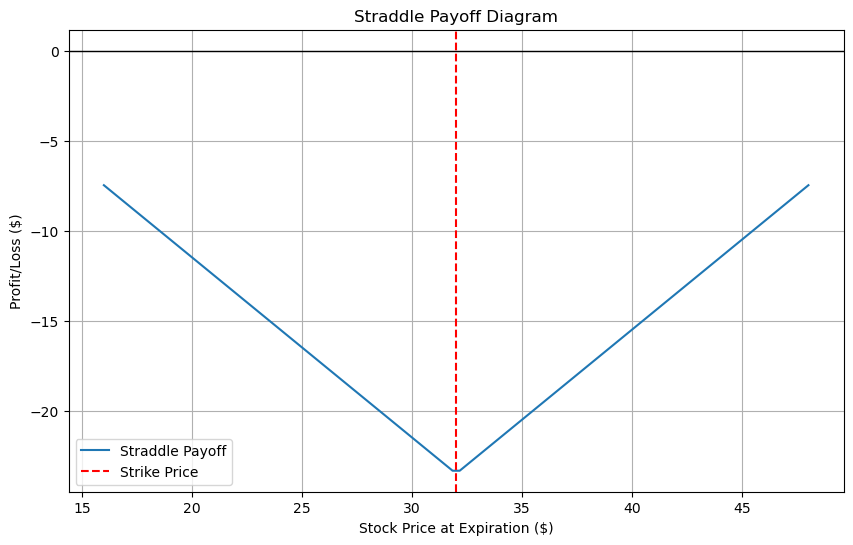

ATM Strike Price: 32.0
Call Option Premium: $4.93
Put Option Premium: $6.8
Total Cost of Straddle: $11.73


In [16]:
"""
This script constructs a volatility trade on GME (GameStop Corp.) by creating a straddle using the yfinance package.
A straddle involves buying both a call and a put option at the same strike price and expiration date.
This strategy profits from significant moves in either direction of the stock price, making it ideal for volatile markets.
The script fetches GME option data, selects the nearest expiration date and an at-the-money (ATM) strike price,
calculates the total cost of the straddle, and visualizes the payoff diagram using matplotlib.
The result is a comprehensive analysis of the potential profit and loss of the straddle strategy based on different stock price scenarios at expiration.
"""


# Fetch GME option data
gme = yf.Ticker("GME")
expirations = gme.options
nearest_expiration = expirations[0]  # Select the nearest expiration date

# Fetch option chain for the nearest expiration date
option_chain = gme.option_chain(nearest_expiration)
calls = option_chain.calls
puts = option_chain.puts

# Select an at-the-money (ATM) strike price
current_price = gme.history(period='1d')['Close'][0]
atm_strike = min(calls['strike'], key=lambda x: abs(x - current_price))

# Get the ATM call and put options
atm_call = calls[calls['strike'] == atm_strike].iloc[0]
atm_put = puts[puts['strike'] == atm_strike].iloc[0]

# Calculate the total cost of the straddle
total_cost = atm_call['lastPrice'] + atm_put['lastPrice']

# Define a function to calculate and plot the straddle payoff
def plot_straddle_payoff(strike, call_price, put_price, total_cost):
    S = np.linspace(0.5 * strike, 1.5 * strike, 100)
    call_payoff = np.maximum(S - strike, 0) - call_price
    put_payoff = np.maximum(strike - S, 0) - put_price
    straddle_payoff = call_payoff + put_payoff

    plt.figure(figsize=(10, 6))
    plt.plot(S, straddle_payoff - total_cost, label='Straddle Payoff')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(strike, color='red', linestyle='--', label='Strike Price')
    plt.xlabel('Stock Price at Expiration ($)')
    plt.ylabel('Profit/Loss ($)')
    plt.title('Straddle Payoff Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the straddle payoff
plot_straddle_payoff(atm_strike, atm_call['lastPrice'], atm_put['lastPrice'], total_cost)

# Print the details of the trade
print(f"ATM Strike Price: {atm_strike}")
print(f"Call Option Premium: ${atm_call['lastPrice']}")
print(f"Put Option Premium: ${atm_put['lastPrice']}")
print(f"Total Cost of Straddle: ${total_cost}")


/var/folders/kz/_jxr42t969j3x9sdgjxvqjsc0000gn/T/ipykernel_95655/3252854636.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = gme.history(period='1d')['Close'][0]


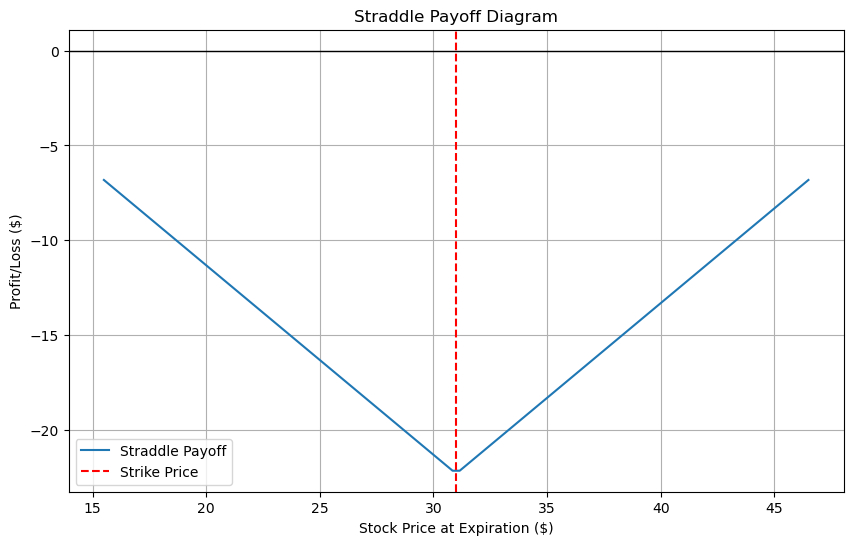

ATM Strike Price: 31.0
Call Option Premium: $5.65
Put Option Premium: $5.51
Total Cost of Straddle: $11.16


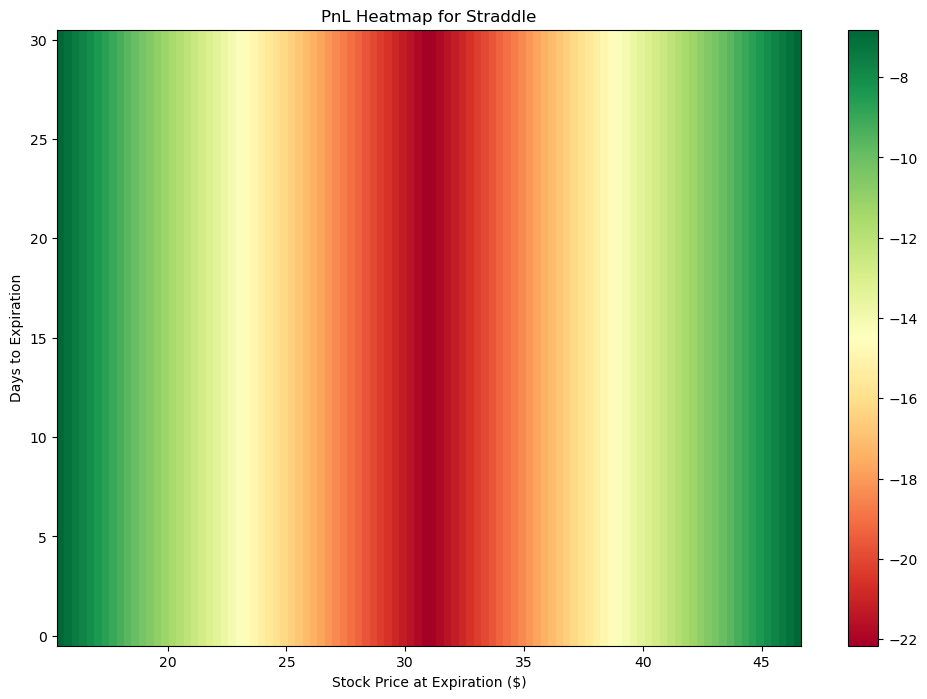

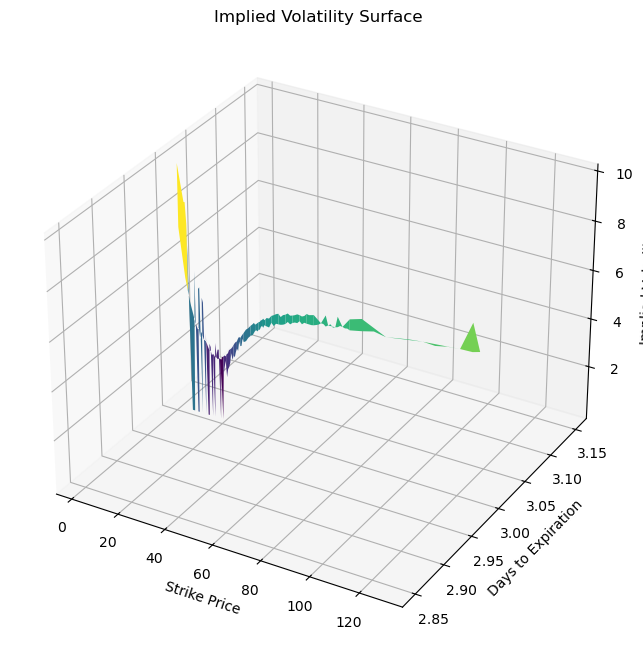

In [20]:
"""
This script constructs a volatility trade on GME (GameStop Corp.) by creating a straddle using the yfinance package.
A straddle involves buying both a call and a put option at the same strike price and expiration date.
This strategy profits from significant moves in either direction of the stock price, making it ideal for volatile markets.
The script fetches GME option data, selects the nearest expiration date and an at-the-money (ATM) strike price,
calculates the total cost of the straddle, and visualizes the payoff diagram using matplotlib.
Additionally, it provides further graphics like a PnL heatmap and an implied volatility surface.
"""

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Fetch GME option data
gme = yf.Ticker("GME")
expirations = gme.options
nearest_expiration = expirations[0]  # Select the nearest expiration date

# Fetch option chain for the nearest expiration date
option_chain = gme.option_chain(nearest_expiration)
calls = option_chain.calls
puts = option_chain.puts

# Select an at-the-money (ATM) strike price
current_price = gme.history(period='1d')['Close'][0]
atm_strike = min(calls['strike'], key=lambda x: abs(x - current_price))

# Get the ATM call and put options
atm_call = calls[calls['strike'] == atm_strike].iloc[0]
atm_put = puts[puts['strike'] == atm_strike].iloc[0]

# Calculate the total cost of the straddle
total_cost = atm_call['lastPrice'] + atm_put['lastPrice']

# Define a function to calculate and plot the straddle payoff
def plot_straddle_payoff(strike, call_price, put_price, total_cost):
    S = np.linspace(0.5 * strike, 1.5 * strike, 100)
    call_payoff = np.maximum(S - strike, 0) - call_price
    put_payoff = np.maximum(strike - S, 0) - put_price
    straddle_payoff = call_payoff + put_payoff

    plt.figure(figsize=(10, 6))
    plt.plot(S, straddle_payoff - total_cost, label='Straddle Payoff')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(strike, color='red', linestyle='--', label='Strike Price')
    plt.xlabel('Stock Price at Expiration ($)')
    plt.ylabel('Profit/Loss ($)')
    plt.title('Straddle Payoff Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the straddle payoff
plot_straddle_payoff(atm_strike, atm_call['lastPrice'], atm_put['lastPrice'], total_cost)

# Print the details of the trade
print(f"ATM Strike Price: {atm_strike}")
print(f"Call Option Premium: ${atm_call['lastPrice']}")
print(f"Put Option Premium: ${atm_put['lastPrice']}")
print(f"Total Cost of Straddle: ${total_cost}")

# Define a function to create a PnL heatmap
def plot_pnl_heatmap(strike, call_price, put_price, total_cost, days_to_exp):
    S = np.linspace(0.5 * strike, 1.5 * strike, 100)
    T = np.linspace(0, days_to_exp, days_to_exp + 1)
    X, Y = np.meshgrid(S, T)
    call_payoff = np.maximum(X - strike, 0) - call_price
    put_payoff = np.maximum(strike - X, 0) - put_price
    straddle_payoff = call_payoff + put_payoff

    fig, ax = plt.subplots(figsize=(12, 8))
    c = ax.pcolormesh(X, Y, straddle_payoff - total_cost, shading='auto', cmap='RdYlGn')
    fig.colorbar(c, ax=ax)
    ax.set_xlabel('Stock Price at Expiration ($)')
    ax.set_ylabel('Days to Expiration')
    ax.set_title('PnL Heatmap for Straddle')
    plt.show()

# Plot the PnL heatmap for the next 30 days
plot_pnl_heatmap(atm_strike, atm_call['lastPrice'], atm_put['lastPrice'], total_cost, 30)

# Define a function to plot the implied volatility surface
def plot_iv_surface(calls, puts):
    strikes = np.unique(calls['strike'].values)
    expirations = np.array([(pd.to_datetime(nearest_expiration) - pd.to_datetime('today')).days])
    
    call_ivs = []
    put_ivs = []
    for strike in strikes:
        call_iv = calls[calls['strike'] == strike]['impliedVolatility']
        put_iv = puts[puts['strike'] == strike]['impliedVolatility']
        if not call_iv.empty:
            call_ivs.append(call_iv.values[0])
        else:
            call_ivs.append(np.nan)  # Append NaN if no IV value is found
        if not put_iv.empty:
            put_ivs.append(put_iv.values[0])
        else:
            put_ivs.append(np.nan)  # Append NaN if no IV value is found

    X, Y = np.meshgrid(strikes, expirations)
    Z = np.array([call_ivs, put_ivs])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Days to Expiration')
    ax.set_zlabel('Implied Volatility')
    ax.set_title('Implied Volatility Surface')
    plt.show()

# Plot the implied volatility surface
plot_iv_surface(calls, puts)
